<a href="https://colab.research.google.com/github/fernandops21/Mini-Projeto-1/blob/main/RoofTop_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualização

Roof Imóveis é uma das maiores empresas do ramo imobiliário brasileiro e quer expandir sua área de atuação fazendo um investimento internacional, com isso, ela me contratou, para uma consultoria estratégica.

A empresa irá investir em imóveis no Condado de King, nos Estados Unidos.

Utilizando o dataset disponibilizado, irei aplicar os conceitos de CRISP-DM e outras técnicas para **sugerir 5 imóveis os quais a empresa deva investir e 5 nos quais deva passar longe.**

# King County - Condado de King - Washington
O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. [Wikipédia](https://pt.wikipedia.org/wiki/Condado_de_King_(Washington))

O Datset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um totoal de 21613 registros com um total de 21 atributos. 

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

Variável | Descrição
--- | ---
id	| Identificador único do imóvel
date	| Data da Venda
price	| Preço de venda
bedrooms	| Nº de Quartos
bathrooms	| Nº de Banheiros
sqft_liv	| Tamanho de área habitável em ft²
sqft_lot	| Tamanho do terreno em ft²
floors	| Número de andares
waterfront	| Indicativo se o imóvel é a beira-mar
view	| Grau de quão belo é a vista do imóvel (0 a 4)
condition	| Condição da casa (1 a 5) 
grade	| Classificação por qualidade de material utilizado na construção
sqft_above	| Área em acima do solo em ft²
sqft_basmt	|  Área em abaixo do solo em ft²
yr_built	| Ano de construção
yr_renov	| Ano de restauração, caso o contrário, 0.
zipcode	| Zip Code 5 - Similar ao CEP
lat	| Latitude
long	| Longitude
squft_liv15	| Média da área habitável dos 15 imóveis mais próximos, em ft²
squft_lot15	| Média da área habitável dos 15 imóveis mais próximos, em ft²

In [1]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

# Importação dos dados e análises iniciais

In [2]:
#Importando o dataset

url = "https://raw.githubusercontent.com/fernandops21/Mini-Projeto-1/main/kc_house_data.csv"
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Formatação e enriquecimento dos dados

In [4]:
#alterando os tipos de variáveis
df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = pd.Categorical(df['zipcode'])

In [5]:
cols = set(df.columns) - {'id','date'}
df1 = df[list(cols)]
df1.describe(exclude=['category']).apply(lambda s: s.apply('{0:.2f}'.format))

,bathrooms,lat,floors,long,grade,yr_built,condition,yr_renovated,waterfront,price,view,sqft_lot,sqft_basement,sqft_lot15,sqft_living15,sqft_above,sqft_living,bedrooms
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,2.11,47.56,1.49,-122.21,7.66,1971.01,3.41,84.40,0.01,540088.14,0.23,15106.97,291.51,12768.46,1986.55,1788.39,2079.90,3.37
std,0.77,0.14,0.54,0.14,1.18,29.37,0.65,401.68,0.09,367127.20,0.77,41420.51,442.58,27304.18,685.39,828.09,918.44,0.93
min,0.00,47.16,1.00,-122.52,1.00,1900.00,1.00,0.00,0.00,75000.00,0.00,520.00,0.00,651.00,399.00,290.00,290.00,0.00
25%,1.75,47.47,1.00,-122.33,7.00,1951.00,3.00,0.00,0.00,321950.00,0.00,5040.00,0.00,5100.00,1490.00,1190.00,1427.00,3.00
50%,2.25,47.57,1.50,-122.23,7.00,1975.00,3.00,0.00,0.00,450000.00,0.00,7618.00,0.00,7620.00,1840.00,1560.00,1910.00,3.00
75%,2.50,47.68,2.00,-122.12,8.00,1997.00,4.00,0.00,0.00,645000.00,0.00,10688.00,560.00,10083.00,2360.00,2210.00,2550.00,4.00
max,8.00,47.78,3.50,-121.31,13.00,2015.00,5.00,2015.00,1.00,7700000.00,4.00,1651359.00,4820.00,871200.00,6210.00,9410.00,13540.00,33.00


In [6]:
# Checando quantidade de valores faltantes no dataset

df.isnull().sum().sum()

0

In [7]:
# Checando de existem valores duplicados

df.duplicated().sum()

0

In [8]:
#Convertendo square foot para m2 para facilitar análise

df = df.apply(lambda x: x/10.764 if x.name in ['sqft_living', 'sqft_above','sqft_lot15','sqft_living15','sqft_lot','sqft_basement'] else x).round(2)

#Renomeando colunas para m2
df.rename(columns={'sqft_living': 'm2_living', 'sqft_above': 'm2_above', 'sqft_lot15': 'm2_lot15', 'sqft_living15': 'm2_living15', 'sqft_lot': 'm2_lot', 'sqft_basement': 'm2_basement' }, inplace=True)

#Criando o atributo preço/m2

df['m2_price'] = (df.price / df.m2_living).round(2)

In [9]:
df.head(10)

,id,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,m2_price
0,7129300520,2014-10-13,221900.0,3,1.00,109.62,524.90,1.0,0,0,...,109.62,0.00,1955,0,98178,47.51,-122.26,124.49,524.90,2024.27
1,6414100192,2014-12-09,538000.0,3,2.25,238.76,672.80,2.0,0,0,...,201.60,37.16,1951,1991,98125,47.72,-122.32,157.00,709.68,2253.31
2,5631500400,2015-02-25,180000.0,2,1.00,71.53,929.02,1.0,0,0,...,71.53,0.00,1933,0,98028,47.74,-122.23,252.69,748.98,2516.43
3,2487200875,2014-12-09,604000.0,4,3.00,182.09,464.51,1.0,0,0,...,97.55,84.54,1965,0,98136,47.52,-122.39,126.35,464.51,3317.04
4,1954400510,2015-02-18,510000.0,3,2.00,156.08,750.65,1.0,0,0,...,156.08,0.00,1987,0,98074,47.62,-122.04,167.22,697.05,3267.56
5,7237550310,2014-05-12,1225000.0,4,4.50,503.53,9469.53,1.0,0,0,...,361.39,142.14,2001,0,98053,47.66,-122.00,442.21,9469.53,2432.82
6,1321400060,2014-06-27,257500.0,3,2.25,159.33,633.50,2.0,0,0,...,159.33,0.00,1995,0,98003,47.31,-122.33,207.92,633.50,1616.14
7,2008000270,2015-01-15,291850.0,3,1.50,98.48,902.17,1.0,0,0,...,98.48,0.00,1963,0,98198,47.41,-122.32,153.29,902.17,2963.55
8,2414600126,2015-04-15,229500.0,3,1.00,165.37,693.98,1.0,0,0,...,97.55,67.82,1960,0,98146,47.51,-122.34,165.37,753.72,1387.80
9,3793500160,2015-03-12,323000.0,3,2.50,175.59,609.44,2.0,0,0,...,175.59,0.00,2003,0,98038,47.37,-122.03,222.04,703.27,1839.51


In [10]:
df.m2_price.describe()

count    21613.000000
mean      2843.381478
std       1184.694522
min        942.820000
25%       1962.100000
50%       2633.400000
75%       3426.490000
max       8720.720000
Name: m2_price, dtype: float64

# Analisando o preço por m² (área construída)

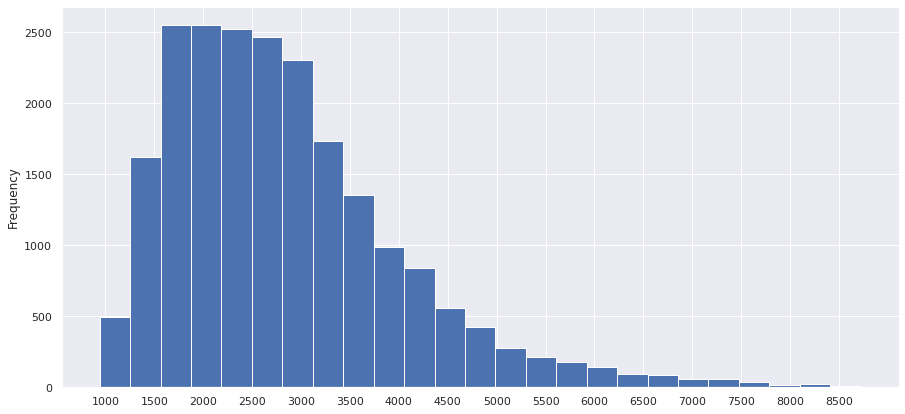

In [11]:
plt.figure(figsize=(15,7))
df.m2_price.plot.hist(bins=25)
plt.xticks(np.arange(1000, 9000, step=500))
plt.show()

Os preços parecem seguir uma distribuição exponencial, e estão concentrados principalmente entre 1500 e 3000 dólares.

# Dividindo o dataset em 5 grandes regiões

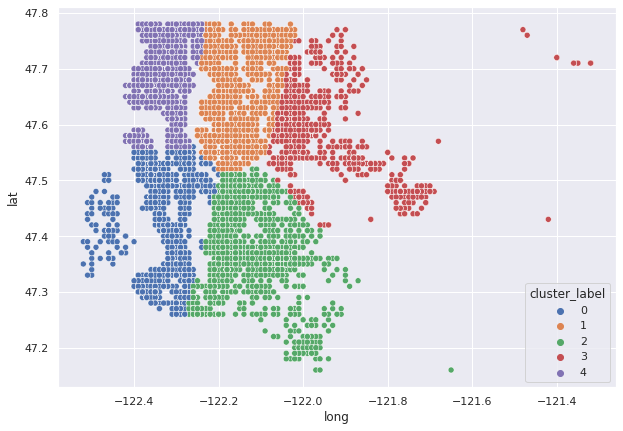

In [12]:
# Criando 5 clusters por região
df2 = df.loc[:,['id','lat','long']]

kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=1)
kmeans.fit(df2[df2.columns[1:3]]) # Compute k-means clustering.
df2['cluster_label'] = kmeans.fit_predict(df2[df2.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df2[df2.columns[1:3]]) # Labels of each point

# Gerando visualização dos clusters

plt.figure(figsize=(10,7))
sns.scatterplot(x= 'long', y= 'lat', data=df2, hue='cluster_label', palette="deep");


In [13]:
#Juntando a classificação ao dataset original

df['cluster_label'] = df2['cluster_label']

# Contando a quantidade de unidades por cluster

df.groupby(['cluster_label'])['cluster_label'].count()

cluster_label
0    4202
1    4366
2    4010
3    2618
4    6417
Name: cluster_label, dtype: int64

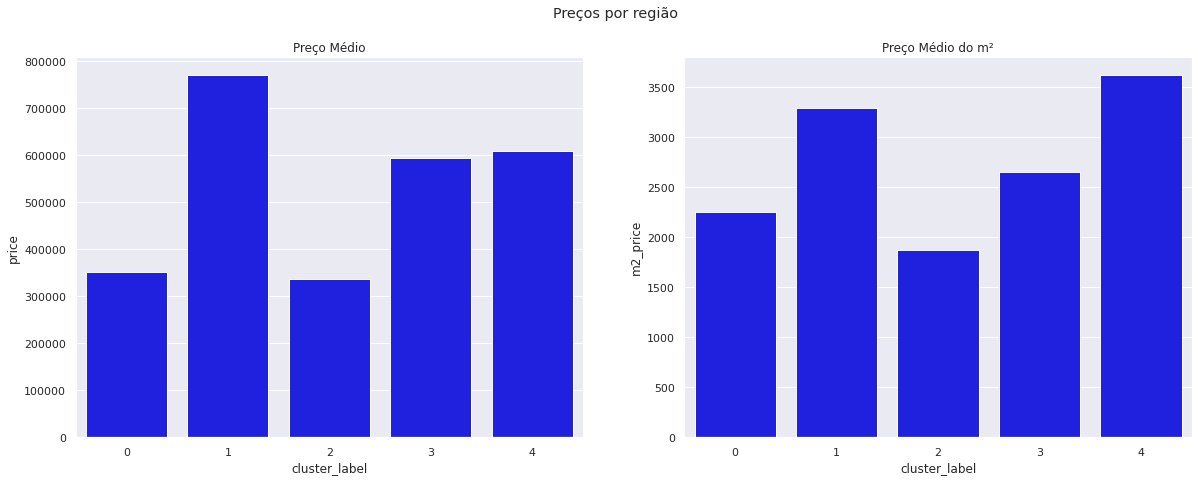

In [14]:
## Comparando o preço por Região

df_cluster = df.groupby(['cluster_label']).agg('mean').reset_index().round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.barplot(x='cluster_label',y='price', color='blue', capsize= 0, data= df_cluster, ax=axes[0]).set(title='Preço Médio')
sns.barplot(x='cluster_label',y='m2_price', color='blue', capsize= 0, data= df_cluster, ax=axes[1]).set(title='Preço Médio do m²')
fig.suptitle('Preços por região')
plt.show()

Podemos perceber que a média do preço do m² varia bastante dependendo da região. Portanto as análises serão feitas sempre por região.

# Definindo uma estratégia vencedora de investimento

Nosso processo decisório se baseou em três principais pilares.
1. Valor
1. Liquidez
1. Gestão de risco

**Gestão do Risco**  
Por se tratar da entrada em um novo mercado, optaremos por uma estratégia mais conservadora, diversificando o investimento e diluindo assim o risco.

A sugestão é de investimento em 1 imóvel de cada uma das cinco grandes regiões. Seguindo essa ideia também iremos sugerir 1 imóvel, por região, que não deverá ser adquirido em hipótese alguma pela empresa.
  
    
**Liquidez**  
Buscamos um imóvel em boas condições (condition 4 ou 5), com uma boa vista (3 ou 4) e com boa qualidade de construção (8+).
  
  
**Valor**  
Além disso, como nosso próposito maior é o lucro, buscaremos por descontos no mercado (preço médio abaixo da média).





# Selecionando imóveis que atendem aos nossos critérios

In [15]:
# Filtrando pelos nossos critérios

df_selecao = df[(df['condition']>=4) & (df['view']>=4) & (df['grade']>=8)]
df_selecao.head()

,id,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,m2_price,cluster_label
58,7922800400,2014-08-27,951000.0,5,3.25,301.93,1332.40,2.0,0,4,...,0.00,1968,0,98008,47.59,-122.12,274.99,1026.01,3149.74,1
312,1860600135,2014-05-02,2384000.0,5,2.50,339.09,840.77,2.0,0,4,...,26.01,1921,0,98119,47.63,-122.37,267.56,501.67,7030.58,4
409,1560930070,2014-09-11,840000.0,4,3.50,263.84,3729.00,1.0,0,4,...,0.00,1986,0,98038,47.40,-122.03,295.43,3423.63,3183.75,2
540,622049114,2015-02-18,2125000.0,3,2.50,501.95,2236.06,2.0,1,4,...,0.00,1976,0,98166,47.42,-122.35,369.75,9696.58,4233.49,0
656,3760500116,2014-11-20,3070000.0,3,2.50,365.11,5190.17,1.0,1,4,...,148.64,1957,0,98034,47.70,-122.22,253.62,2445.56,8408.42,1


In [16]:
# Contando imóveis selecionados por cluster

df_selecao.groupby(['cluster_label'])['cluster_label'].count()

cluster_label
0    26
1    49
2     1
3     2
4    38
Name: cluster_label, dtype: int64

Dadas as nossas condições de investimento temos apenas um imóvel no grupo 2 e dois imóveis no grupo 3, facilitando nossa decisão nessas duas regiões. Para as outras regiões prosseguiremos com a análise do preço médio por m².

## Calculando preço médio dos imóveis que atendem nossa seleção por grupo

In [17]:
pm_0 = df_selecao[df_selecao['cluster_label']==0]['m2_price'].mean().round(2)
pm_1 = df_selecao[df_selecao['cluster_label']==1]['m2_price'].mean().round(2)
pm_4 = df_selecao[df_selecao['cluster_label']==4]['m2_price'].mean().round(2)
pm = [[0, pm_0],[1,pm_1],[4,pm_4]]
df_pm = pd.DataFrame(pm,columns=['Grupo','Preço_Médio_m²'])
df_pm

,Grupo,Preço_Médio_m²
0,0,4423.25
1,1,5406.47
2,4,4605.62


Filtrando imóveis com 20% de desconto do preço de mercado por grupo

In [18]:
df_selecao_0 = df_selecao[(df_selecao['cluster_label']==0) & (df_selecao['m2_price']<=0.8*pm_0)]
df_selecao_1 = df_selecao[(df_selecao['cluster_label']==1) & (df_selecao['m2_price']<=0.8*pm_1)]
df_selecao_4 = df_selecao[(df_selecao['cluster_label']==4) & (df_selecao['m2_price']<=0.8*pm_4)]

Checando se algum dos imóveis em nossa seleção foi vendido mais de uma vez no período.

In [19]:
df_selecao_0.id.value_counts()

9322800260    1
7784000110    1
7567600030    1
5119400075    1
3222049044    1
1822039138    1
1795800040    1
9322800210    1
Name: id, dtype: int64

In [20]:
df_selecao_1.id.value_counts()

7922800400    1
7855000550    1
7855900110    1
7856410430    1
7855000460    1
7855200120    1
7856400410    1
7922900030    1
8920100041    1
7922900040    1
7855400630    1
9541800190    1
3999300290    1
9542100005    1
Name: id, dtype: int64

In [21]:
df_selecao_4.id.value_counts()

913000315     1
7639900025    1
3585900500    1
9273200115    1
1454600156    1
3577000116    1
9285800330    1
1251200155    1
6837700175    1
1818800235    1
3585900080    1
Name: id, dtype: int64

Nenhum imóvel possui mais de um registro de compra/venda.

# Selecionando um imóvel de cada uma das regiões

### Região 0

In [22]:
# Filtrando por outros atributos
df_selecao_0[['id','condition','view','grade','m2_price','m2_living','bedrooms','bathrooms','waterfront','view','yr_built','yr_renovated','price']].reset_index(drop=True)

,id,condition,view,grade,m2_price,m2_living,bedrooms,bathrooms,waterfront,view,yr_built,yr_renovated,price
0,9322800260,4,4,9,2916.38,188.59,4,1.75,0,4,1939,0,550000.0
1,7784000110,4,4,8,3374.80,226.68,5,1.75,0,4,1944,0,765000.0
2,7567600030,4,4,8,3057.98,245.26,5,1.75,1,4,1954,0,750000.0
3,5119400075,4,4,8,3352.74,283.35,3,3.25,1,4,1962,0,950000.0
4,3222049044,4,4,8,3221.45,259.20,3,3.00,1,4,1977,0,835000.0
5,1822039138,4,4,8,2783.84,215.53,2,2.25,1,4,1976,0,600000.0
6,1795800040,4,4,11,2706.01,498.89,4,3.25,0,4,1990,0,1350000.0
7,9322800210,4,4,9,2706.21,325.16,4,2.25,0,4,1938,0,879950.0


Nossa indicação é a casa de **ID 1795800040**. A falta de vista para o mar é compensada por seus incríveis 499 m². Possui o maior desconto no m² e tem a melhor estrutura de construção (11). Além disso é o mais novo dos imóveis selecionados, tendo sido construido em 1990. Possui 4 quartos, sendo 3 suítes e um lavabo.

### Região 1

In [23]:
df_selecao_1[['id','condition','view','grade','m2_price','m2_living','bedrooms','bathrooms','waterfront','view','yr_built','yr_renovated','price']].sort_values(['condition','grade'], ascending=False).reset_index(drop=True)

,id,condition,view,grade,m2_price,m2_living,bedrooms,bathrooms,waterfront,view,yr_built,yr_renovated,price
0,7855200120,5,4,10,3964.12,345.60,4,2.75,0,4,1962,0,1370000.0
1,7855000460,5,4,9,3961.42,366.03,3,2.75,0,4,1967,0,1450000.0
2,8920100041,5,4,9,2953.75,275.92,4,1.75,0,4,1962,0,815000.0
3,7856410430,4,4,10,2615.48,529.54,6,2.75,0,4,1977,0,1385000.0
4,7855000550,4,4,9,3091.45,355.82,4,2.50,0,4,1969,0,1100000.0
5,7855900110,4,4,9,3387.54,321.44,4,2.75,0,4,1974,0,1088890.0
6,7856400410,4,4,9,3577.12,307.51,4,2.25,0,4,1973,0,1100000.0
7,7922900040,4,4,9,3214.23,334.45,4,3.00,0,4,1976,0,1075000.0
8,9541800190,4,4,9,2822.07,324.23,5,2.50,0,4,1958,0,915000.0
9,3999300290,4,4,9,3492.19,243.40,3,3.50,0,4,1977,0,850000.0


Nossa indicação é sem dúvidas a casa de **ID 8920100041**. Está em excelentes e condições e possui um desconto de mais de 50% do preço médio da região.

### Região 2

In [24]:
df_selecao[df_selecao['cluster_label']==2][['id','condition','view','grade','m2_price','m2_living','bedrooms','bathrooms','waterfront','view','yr_built','yr_renovated','price']]

,id,condition,view,grade,m2_price,m2_living,bedrooms,bathrooms,waterfront,view,yr_built,yr_renovated,price
409,1560930070,4,4,10,3183.75,263.84,4,3.5,0,4,1986,0,840000.0


Imóvel **ID 1560930070**. Melhor imóvel da região e o único que passou em nossos critérios de seleção.

### Região 3

In [25]:
df_selecao[df_selecao['cluster_label']==3][['id','condition','view','grade','m2_price','m2_living','bedrooms','bathrooms','waterfront','view','yr_built','yr_renovated','price']]

,id,condition,view,grade,m2_price,m2_living,bedrooms,bathrooms,waterfront,view,yr_built,yr_renovated,price
11642,5569700075,5,4,9,2886.28,335.38,6,2.75,0,4,1959,0,968000.0
13322,1724069043,4,4,8,3291.02,224.82,3,2.50,0,4,1989,0,739888.0


Nossa sugestão é imóvel de **ID 5569700075**. Excelente preço m², e melhor estrutura e condições da região.

### Região 4

In [26]:
df_selecao_4[['id','condition','view','grade','m2_price','m2_living','bedrooms','bathrooms','waterfront','view','yr_built','yr_renovated','price']].sort_values(['condition','grade'], ascending=False).reset_index(drop=True)

,id,condition,view,grade,m2_price,m2_living,bedrooms,bathrooms,waterfront,view,yr_built,yr_renovated,price
0,3585900500,5,4,11,3477.77,438.50,4,4.25,0,4,1971,0,1525000.0
1,7639900025,5,4,9,3306.06,325.16,4,4.25,0,4,1951,0,1075000.0
2,1251200155,5,4,9,3599.97,277.78,4,3.50,0,4,1925,0,1000000.0
3,1818800235,5,4,8,3472.22,316.80,4,2.75,0,4,1958,0,1100000.0
4,913000315,4,4,9,3586.21,362.50,6,4.50,0,4,1977,0,1300000.0
5,3585900080,4,4,9,3235.27,330.73,6,3.25,0,4,1952,0,1070000.0
6,9273200115,4,4,8,3265.75,382.76,4,2.75,0,4,1947,0,1250000.0
7,1454600156,4,4,8,2057.12,418.06,5,3.25,0,4,1968,0,860000.0
8,3577000116,4,4,8,3327.14,204.38,4,1.00,0,4,1956,0,680000.0
9,9285800330,4,4,8,2951.02,248.05,3,3.75,0,4,1977,0,732000.0


Sem dúvidas nossa recomendação é o imóvel de **ID 3585900500**. Apesar de ser o mais caro da seleção precisamos lembrar que todos os imóveis da lista estão pelo menos 20% abaixo do preço de mercado. O imóvel em questão possui nota máxima no quesito infraestrutura, estando entre as melhores construções de King County.

# Imóveis para não comprar

O critério utilizado será imóveis em péssimas condições (1), com estrutura de construção abaixo de 7 (average) e que possuam o pior preço por m² da região.

### Preço médio por região

In [27]:
pm2_0 = df[df['cluster_label']==0]['m2_price'].mean().round(2)
pm2_1 = df[df['cluster_label']==1]['m2_price'].mean().round(2)
pm2_2 = df[df['cluster_label']==2]['m2_price'].mean().round(2)
pm2_3 = df[df['cluster_label']==3]['m2_price'].mean().round(2)
pm2_4 = df[df['cluster_label']==4]['m2_price'].mean().round(2)

pm2 = [[0, pm2_0],[1,pm2_1],[2,pm2_2],[3,pm2_3],[4,pm2_4]]
df_pm2 = pd.DataFrame(pm2,columns=['Grupo','Preço_Médio_m²'])
df_pm2

,Grupo,Preço_Médio_m²
0,0,2249.44
1,1,3286.41
2,2,1869.32
3,3,2650.99
4,4,3618.07


### Região 0

In [28]:
df_selecao_n = df[(df['condition']==1) & (df['grade']<=6)]
df_selecao_n[(df_selecao_n['cluster_label']==0) & (df_selecao_n['m2_price']>=1.3*pm2_0)][['id','grade','m2_price','price']]



,id,grade,m2_price,price
3202,723049596,6,3388.70,255000.0
13629,2023049218,5,5150.46,445000.0
15371,7936500221,5,7012.68,658000.0


Não investir no imóvel **ID 7936500221**, por estar muito acima do preço médio de sua região e em péssimas condições. 

### Região 1

In [29]:
df_selecao_n[(df_selecao_n['cluster_label']==1) & (df_selecao_n['m2_price']>=1.3*pm2_1)][['id','grade','m2_price','price']]

,id,grade,m2_price,price
2223,3886902445,6,6259.51,535000.0


Não investir no imóvel **ID 3886902445**, por estar muito acima do preço médio de sua região e em péssimas condições.

### Região 2

In [30]:
df_selecao_n[(df_selecao_n['cluster_label']==2) & (df_selecao_n['m2_price']>=1.3*pm2_2)][['id','grade','m2_price','price']]

,id,grade,m2_price,price
7636,4008400515,5,2622.14,190000.0


Não investir no imóvel **ID 4008400515**, por estar muito acima do preço médio de sua região e em péssimas condições.

### Região 3

In [31]:
df_selecao_n[(df_selecao_n['cluster_label']==3) & (df_selecao_n['m2_price']>=1.3*pm2_3)][['id','grade','m2_price','price']]

,id,grade,m2_price,price
19452,3980300371,1,5270.97,142000.0


Não investir no imóvel **ID 3980300371**, por estar muito acima do preço médio de sua região e em péssimas condições.

### Região 4

In [32]:
df_selecao_n[(df_selecao_n['cluster_label']==4) & (df_selecao_n['m2_price']>=1.3*pm2_4)][['id','grade','m2_price','price']]

,id,grade,m2_price,price
18645,7942600910,6,4724.73,575000.0


Não investir no imóvel **ID 7942600910**, por estar muito acima do preço médio de sua região e em péssimas condições.

# Seleção Final

### Sugestão de compra

In [33]:
df5_comprar = df[df.id.isin([1795800040,8920100041,1560930070,5569700075,3585900500])]
df5_comprar

,id,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,m2_price,cluster_label
409,1560930070,2014-09-11,840000.0,4,3.50,263.84,3729.00,1.0,0,4,...,0.00,1986,0,98038,47.40,-122.03,295.43,3423.63,3183.75,2
5850,3585900500,2015-04-02,1525000.0,4,4.25,438.50,1950.95,3.0,0,4,...,0.00,1971,0,98177,47.76,-122.38,279.64,1858.05,3477.77,4
11642,5569700075,2014-05-28,968000.0,6,2.75,335.38,1633.22,1.0,0,4,...,143.07,1959,0,98075,47.57,-122.07,268.49,1306.21,2886.28,3
12137,8920100041,2015-04-28,815000.0,4,1.75,275.92,1382.39,1.0,0,4,...,130.99,1962,0,98075,47.59,-122.09,307.51,1243.78,2953.75,1
13770,1795800040,2014-09-03,1350000.0,4,3.25,498.89,1894.09,2.0,0,4,...,0.00,1990,0,98198,47.40,-122.33,257.34,2068.93,2706.01,0


### Sugestão de não compra

In [34]:
df5_naocomprar = df[df.id.isin([7936500221,3886902445,4008400515,3980300371,7942600910])]
df5_naocomprar

,id,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,m2_price,cluster_label
2223,3886902445,2015-03-16,535000.0,2,1.00,85.47,836.12,1.0,0,0,...,0.0,1954,0,98033,47.68,-122.19,163.51,780.38,6259.51,1
7636,4008400515,2015-01-20,190000.0,1,0.75,72.46,7209.49,1.0,0,0,...,0.0,1945,0,98058,47.44,-122.10,162.58,2865.76,2622.14,2
15371,7936500221,2015-01-14,658000.0,2,1.00,93.83,1323.30,1.0,1,4,...,0.0,1926,0,98136,47.55,-122.40,169.08,1467.11,7012.68,0
18645,7942600910,2014-12-16,575000.0,1,1.00,121.70,805.18,1.5,0,0,...,0.0,1918,0,98122,47.61,-122.31,104.98,445.93,4724.73,4
19452,3980300371,2014-09-26,142000.0,0,0.00,26.94,1939.33,1.0,0,0,...,0.0,1963,0,98024,47.53,-121.89,150.50,2122.82,5270.97,3
